# PCA

## Exploratory Data Analysis (EDA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# loading dataset
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
df_data = df.iloc[:, 1:]
df_target = df.iloc[:, 0]

In [24]:
# info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


No null values, All features are numericals.

In [25]:
# summary
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


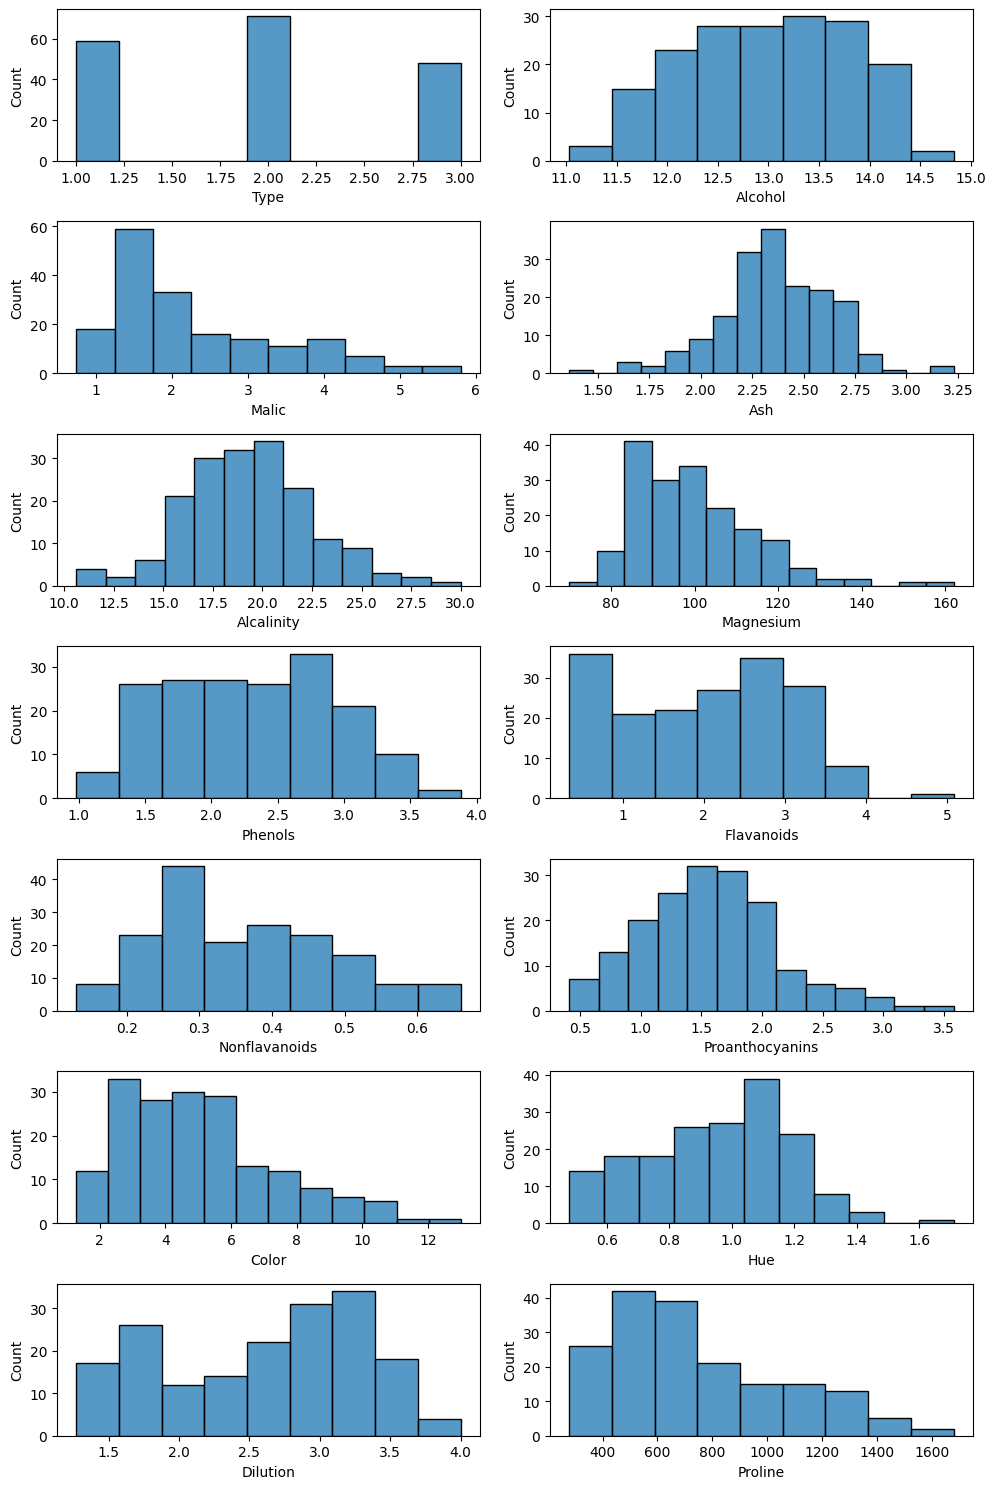

In [26]:
# histograms
fig, axes = plt.subplots(7, 2, figsize=(10, 15))
for i, ax in enumerate(axes.flatten()):
    sns.histplot(df.iloc[:, i], ax=ax)
plt.tight_layout()

Most of the data is somewhat close to normally distributed data.

<Axes: >

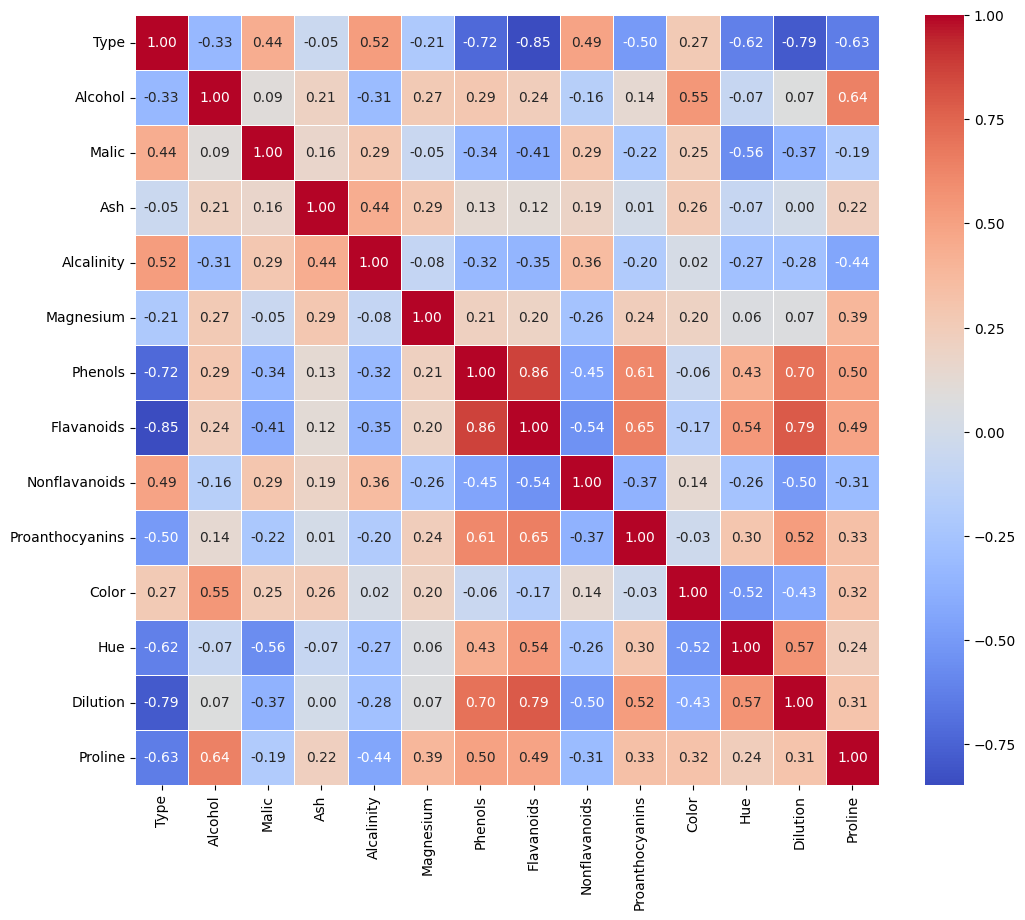

In [27]:
# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

## Dimensionality Reduction with PCA

In [28]:
# standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)

In [29]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -6.51390947e-02, -6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.02441595e+00,  3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
         3.44216131e-01,  1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
        -4.70238043e-02, -1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
        -3.90828774e-01, -5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
         2.92913734e-01, -7.41660423e-01, -1.17969019e-01]])

In [30]:
# weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

In [31]:
# variance explained
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [32]:
# cummulative
sum=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
sum

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17])

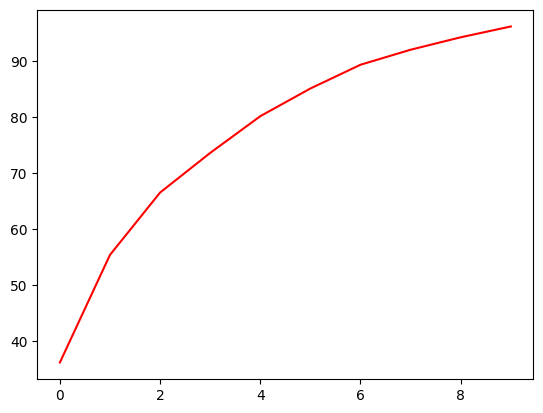

In [33]:
# line plot
plt.plot(sum,color='red')

In [34]:
# taking 6 columns to cover 85% of data
df_pca_6 = df_pca[:,0:6]
df_pca_6

array([[ 3.31675081,  1.44346263, -0.16573904, -0.21563119,  0.69304284,
         0.22388013],
       [ 2.20946492, -0.33339289, -2.02645737, -0.29135832, -0.25765463,
         0.92712024],
       [ 2.51674015,  1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
        -0.54927605],
       ...,
       [-2.67783946,  2.76089913, -0.94094188,  0.31203475,  1.271355  ,
        -0.27306792],
       [-2.38701709,  2.29734668, -0.5506962 , -0.68828455,  0.81395522,
        -1.17878298],
       [-3.20875816,  2.76891957,  1.01391366,  0.59690319, -0.89519259,
        -0.29609218]])

## Clustering with original data

In [35]:
# applying Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels=kmeans.fit(df_data)

# silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df_data, cluster_labels.labels_)

0.5595823478987215

Silhouette score of 55 suggests given is a good model.

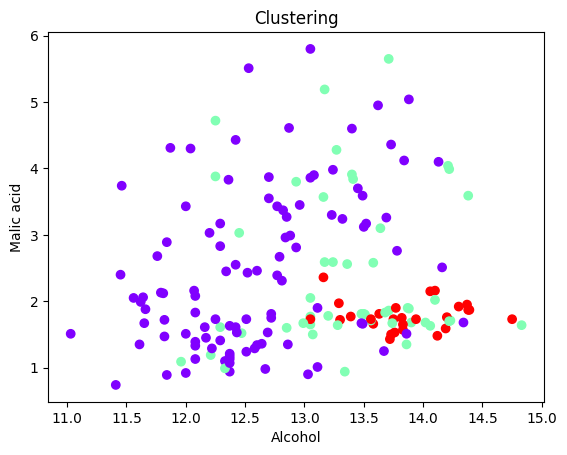

In [39]:
# create scatter plot
scatter = plt.scatter(df['Alcohol'], df['Malic'], c=cluster_labels.labels_, cmap='rainbow')
plt.title('Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.show()

## Clustering with PCA data

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_6=kmeans.fit(df_pca_6)

# silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df_pca_6, cluster_labels_6.labels_)

0.346256619999867

Text(0, 0.5, 'PC2')

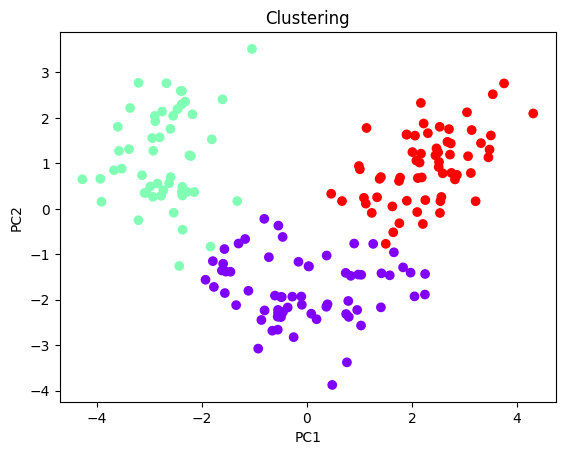

In [41]:
# create scatter plot
scatter = plt.scatter(df_pca_6[:,0], df_pca_6[:,1], c=cluster_labels_6.labels_, cmap='rainbow')
plt.title('Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Comparison & Analysis



Clearly, Visualisation of high dimensional data is better with PCA data compared to original data.
There is little dip in silhouette score with dimensionality reduction.

Direct clustering might be preferable for this specific dataset, as the dimensionality is manageable and the original features are likely meaningful for distinguishing between wine types (with better silhouette score). However, if the goal is to visualize the data or reduce computational complexity, PCA could still be beneficial.

## Conclusion & Insights

Based on analysis, the choice between PCA and direct clustering depends on the specific goals of the analysis, the characteristics of the dataset, and the importance of interpretability versus potential noise reduction and computational efficiency.